# Анализ достпных данных и построение минимальной базовой линии

In [1]:
# !pip3 install ipympl

In [2]:
%matplotlib inline
# import ipywidgets as widgets
import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd

In [3]:
import matplotlib.dates as dts
# import matplotlib as mtl
import seaborn as sns
import statsmodels.api as sm
IMAGE_FOLDER = 'images/'

In [4]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# data_address = 'gdrive/MyDrive/Pump Data'

data_address = 'data'

In [5]:
training_raw = pd.read_csv(data_address +'/cfp_dataset_v1.csv', index_col=False)
training_raw.drop(['Unnamed: 0', 'MIDUPT1138P2300058', 'SHORTUPT1138P2300058', 'LONGUPT1138P2300058', 'DMIDT1138P2300058',  'DLONGT1138P2300058'], axis=1, inplace=True)

In [6]:
training_raw.columns

Index(['WELL_ID', 'UUID', 'DT', 'UNIXDT', 'T1138P6000096', 'T1138P6000315',
       'DMIDT1138P4000064', 'DSHORTT1138P4000064', 'DLONGT1138P4000064',
       'DMIDT1138P2600012', 'DSHORTT1138P2600012', 'DLONGT1138P2600012',
       'DMIDT1205P2300000', 'DSHORTT1205P2300000', 'DLONGT1205P2300000',
       'T1205P2300000', 'T1138P4000064', 'T1138P2600012', 'T1138P600050',
       'T1013P500399', 'DSHORTT1138P2300058'],
      dtype='object')

In [7]:
len(training_raw.columns)

21

<AxesSubplot:>

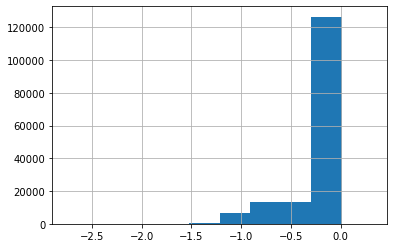

In [8]:
training_raw.DSHORTT1138P2300058.hist()

сколько всего есть скважин и UUID

In [9]:
training_raw.WELL_ID.value_counts()

226000297    9998
226002142    9997
226002627    9992
226003330    9990
226001846    9990
226001947    9987
226002861    9987
226003316    9987
226002416    9982
226000198    9981
226000188    9975
226002603    9706
226002307    9607
226003080    9600
226003074    9578
226002998    8725
226002148    3180
Name: WELL_ID, dtype: int64

In [10]:
len(training_raw.WELL_ID.value_counts())

17

In [11]:
training_raw.UUID.value_counts()

226002307028938300    1
226003080030182400    1
226003316030479400    1
226001846030843900    1
226002861031287600    1
                     ..
226003330031182600    1
226002998031360800    1
226002142028628100    1
226002142030861300    1
226003330029726100    1
Name: UUID, Length: 160262, dtype: int64

In [12]:
training_raw.groupby('WELL_ID')['DSHORTT1138P2300058'].mean()

WELL_ID
226000188   -0.158012
226000198   -0.191680
226000297   -0.216085
226001846   -0.192431
226001947   -0.021665
226002142   -0.210095
226002148   -0.054385
226002307   -0.042508
226002416   -0.113366
226002603   -0.009723
226002627   -0.121966
226002861   -0.093735
226002998   -0.063499
226003074   -0.230264
226003080   -0.201001
226003316   -0.331752
226003330   -0.193445
Name: DSHORTT1138P2300058, dtype: float64

In [13]:
only_1_bad = training_raw[training_raw['WELL_ID'] == 226003316].copy()
only_1_bad.sort_values('DT', inplace=True)

In [14]:
only_1_bad.set_index('DT', inplace=True)
only_1_bad.index = pd.to_datetime(only_1_bad.index)
only_1_bad.index

DatetimeIndex(['2019-06-27 06:40:00', '2019-06-27 06:45:00',
               '2019-06-27 06:50:00', '2019-06-27 06:55:00',
               '2019-06-27 07:00:00', '2019-06-27 07:05:00',
               '2019-06-27 07:10:00', '2019-06-27 07:15:00',
               '2019-06-27 07:20:00', '2019-06-27 07:25:00',
               ...
               '2019-07-31 23:10:00', '2019-07-31 23:15:00',
               '2019-07-31 23:20:00', '2019-07-31 23:25:00',
               '2019-07-31 23:30:00', '2019-07-31 23:35:00',
               '2019-07-31 23:40:00', '2019-07-31 23:45:00',
               '2019-07-31 23:50:00', '2019-07-31 23:55:00'],
              dtype='datetime64[ns]', name='DT', length=9987, freq=None)

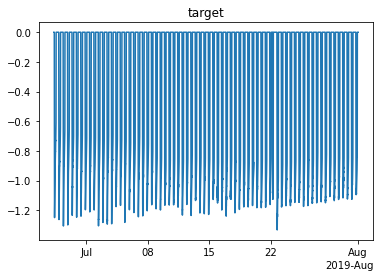

In [15]:
target = only_1_bad.DSHORTT1138P2300058
v1 = only_1_bad.DMIDT1138P4000064

fig, ax = plt.subplots()
ax.plot( target)

locator = dts.AutoDateLocator(minticks=3, maxticks=10)
formatter = dts.ConciseDateFormatter(locator)

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_title('target')

plt.show()
plt.close()

In [16]:
columns_to_plot = ['T1138P6000096', 'T1138P6000315',
       'DMIDT1138P4000064', 'DSHORTT1138P4000064', 'DLONGT1138P4000064',
       'DMIDT1138P2600012', 'DSHORTT1138P2600012', 'DLONGT1138P2600012',
       'DMIDT1205P2300000', 'DSHORTT1205P2300000', 'DLONGT1205P2300000',
       'T1205P2300000', 'T1138P4000064', 'T1138P2600012', 'T1138P600050',
        'DSHORTT1138P2300058']

In [17]:
training_raw.index[:600]

RangeIndex(start=0, stop=600, step=1)

In [18]:
only_1_bad.head()

,WELL_ID,UUID,UNIXDT,T1138P6000096,T1138P6000315,DMIDT1138P4000064,DSHORTT1138P4000064,DLONGT1138P4000064,DMIDT1138P2600012,DSHORTT1138P2600012,DLONGT1138P2600012,DMIDT1205P2300000,DSHORTT1205P2300000,DLONGT1205P2300000,T1205P2300000,T1138P4000064,T1138P2600012,T1138P600050,T1013P500399,DSHORTT1138P2300058
DT,,,,,,,,,,,,,,,,,,,,
2019-06-27 06:40:00,226003316,226003316028536000,1561617600,0,20700,0.048669,0.0,0.348942,0.011497,0.0,0.156871,0.004766,0.0,0.001554,1.134409,0,0.0,0.0,13.742605,0.0
2019-06-27 06:45:00,226003316,226003316028536300,1561617900,0,21000,0.048669,0.0,0.348942,0.011497,0.0,0.156871,0.004766,0.0,0.001554,1.134409,0,0.0,0.0,13.742605,0.0
2019-06-27 06:50:00,226003316,226003316028536600,1561618200,0,21300,0.048669,0.0,0.348942,0.011497,0.0,0.156871,0.004766,0.0,0.001554,1.134409,0,0.0,0.0,13.742605,0.0
2019-06-27 06:55:00,226003316,226003316028536900,1561618500,0,21600,0.048669,0.0,0.348942,0.011497,0.0,0.156871,0.004766,0.0,0.001554,1.134409,0,0.0,0.0,13.742605,0.0
2019-06-27 07:00:00,226003316,226003316028537200,1561618800,0,21900,0.048669,0.0,0.348942,0.011497,0.0,0.156871,0.004766,0.0,0.001554,1.134409,0,0.0,0.0,13.742605,0.0


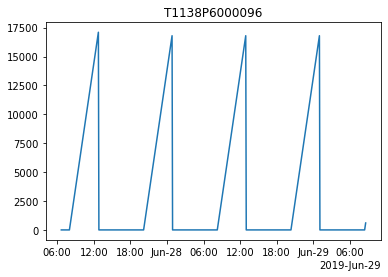

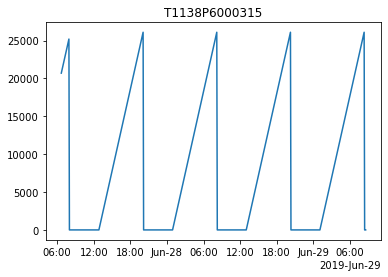

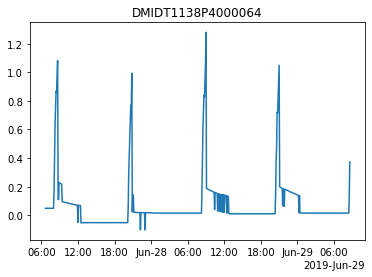

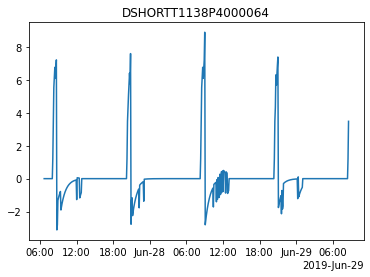

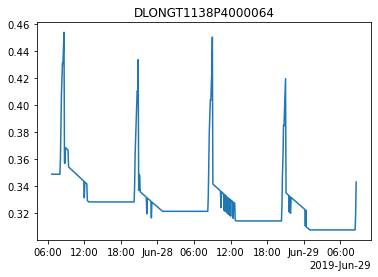

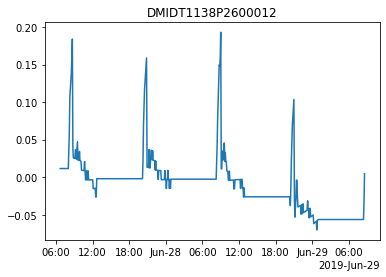

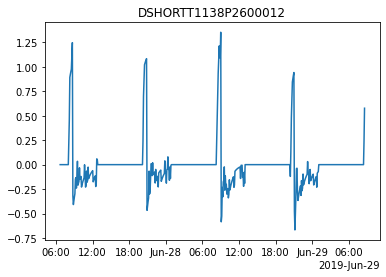

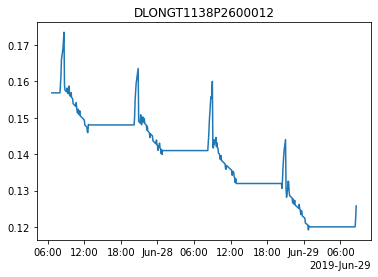

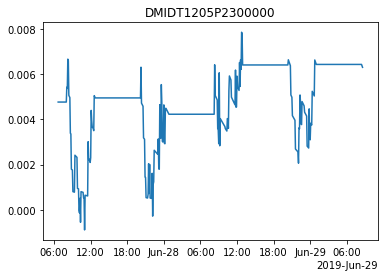

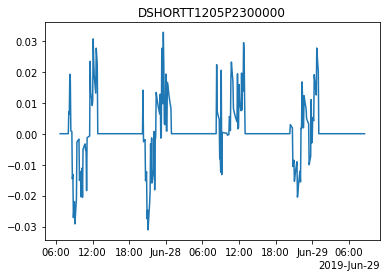

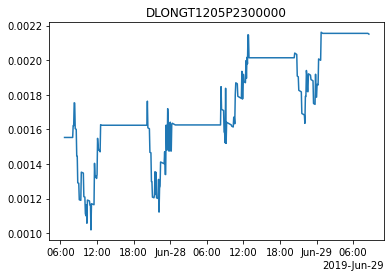

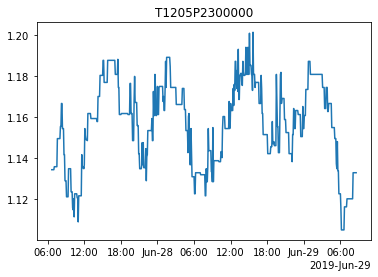

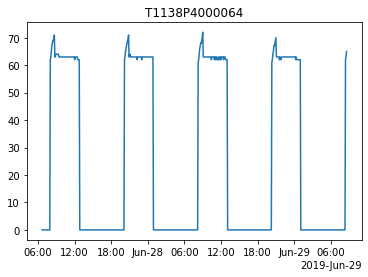

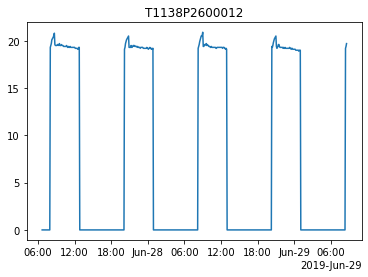

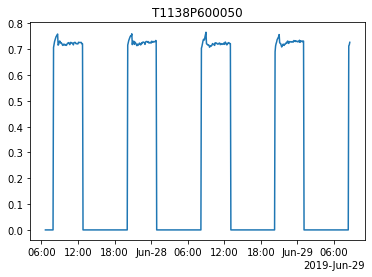

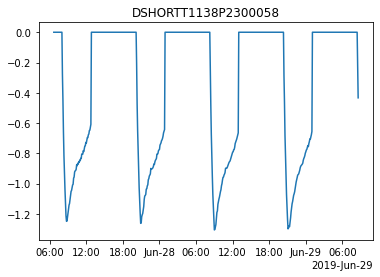

In [19]:

pos = 0

for name in columns_to_plot:
    fig, ax = plt.subplots()
    ax.plot([*only_1_bad.index][:600],  only_1_bad[name][:600])

    locator = dts.AutoDateLocator(minticks=3, maxticks=10)
    formatter = dts.ConciseDateFormatter(locator)

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_title(name)

plt.show()
plt.close()


## Сравнение результатов

In [21]:
tcn_resids = pd.read_csv('residuals/tcn1residual_data.csv', index_col=False).drop('Unnamed: 0', axis=1)
nbeats_resids = pd.read_csv('residuals/nbeats1residual_data.csv', index_col=False).drop('Unnamed: 0', axis=1)
tft_resids = pd.read_csv('residuals/tft1residual_data.csv', index_col=False).drop('Unnamed: 0', axis=1)
tft_resids['true'] = (tft_resids.true - tft_resids.true.min())/(tft_resids.true.max() - tft_resids.true.min())
transfomers_resid = pd.read_csv('residuals/trans1residual_data.csv', index_col=False).drop('Unnamed: 0', axis=1)

residulas = tcn_resids.append(transfomers_resid)
residulas = residulas.append(nbeats_resids)
residulas = residulas.append(tft_resids)


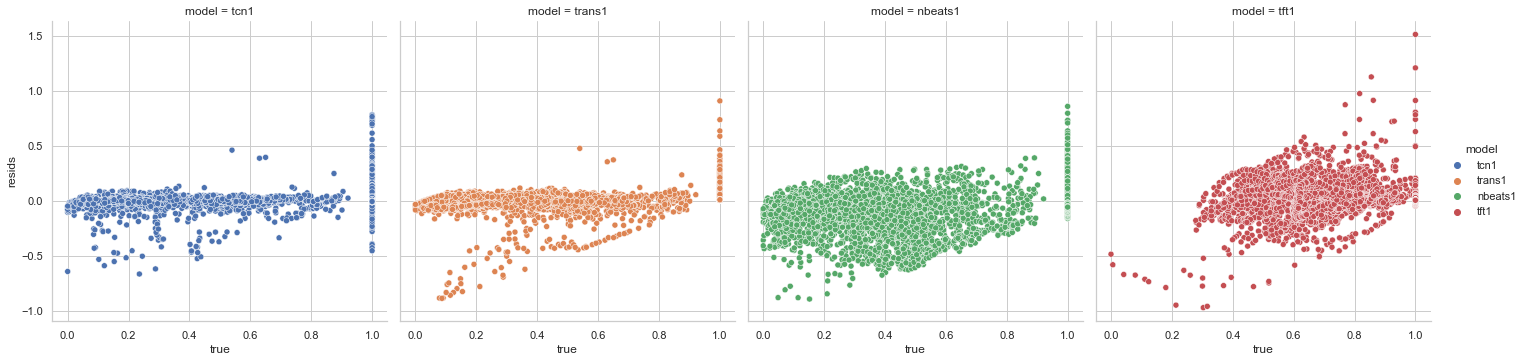

In [22]:
sns.set_theme(style="whitegrid")


resid_scatter = sns.relplot(
    data=residulas, x="true", y="resids",
    col="model", hue='model',
    kind="scatter"
)

resid_scatter.savefig(IMAGE_FOLDER + 'resid_scatterplot.png', dpi=300)

C:\Users\ksetd\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\ksetd\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\ksetd\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\ksetd\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt str

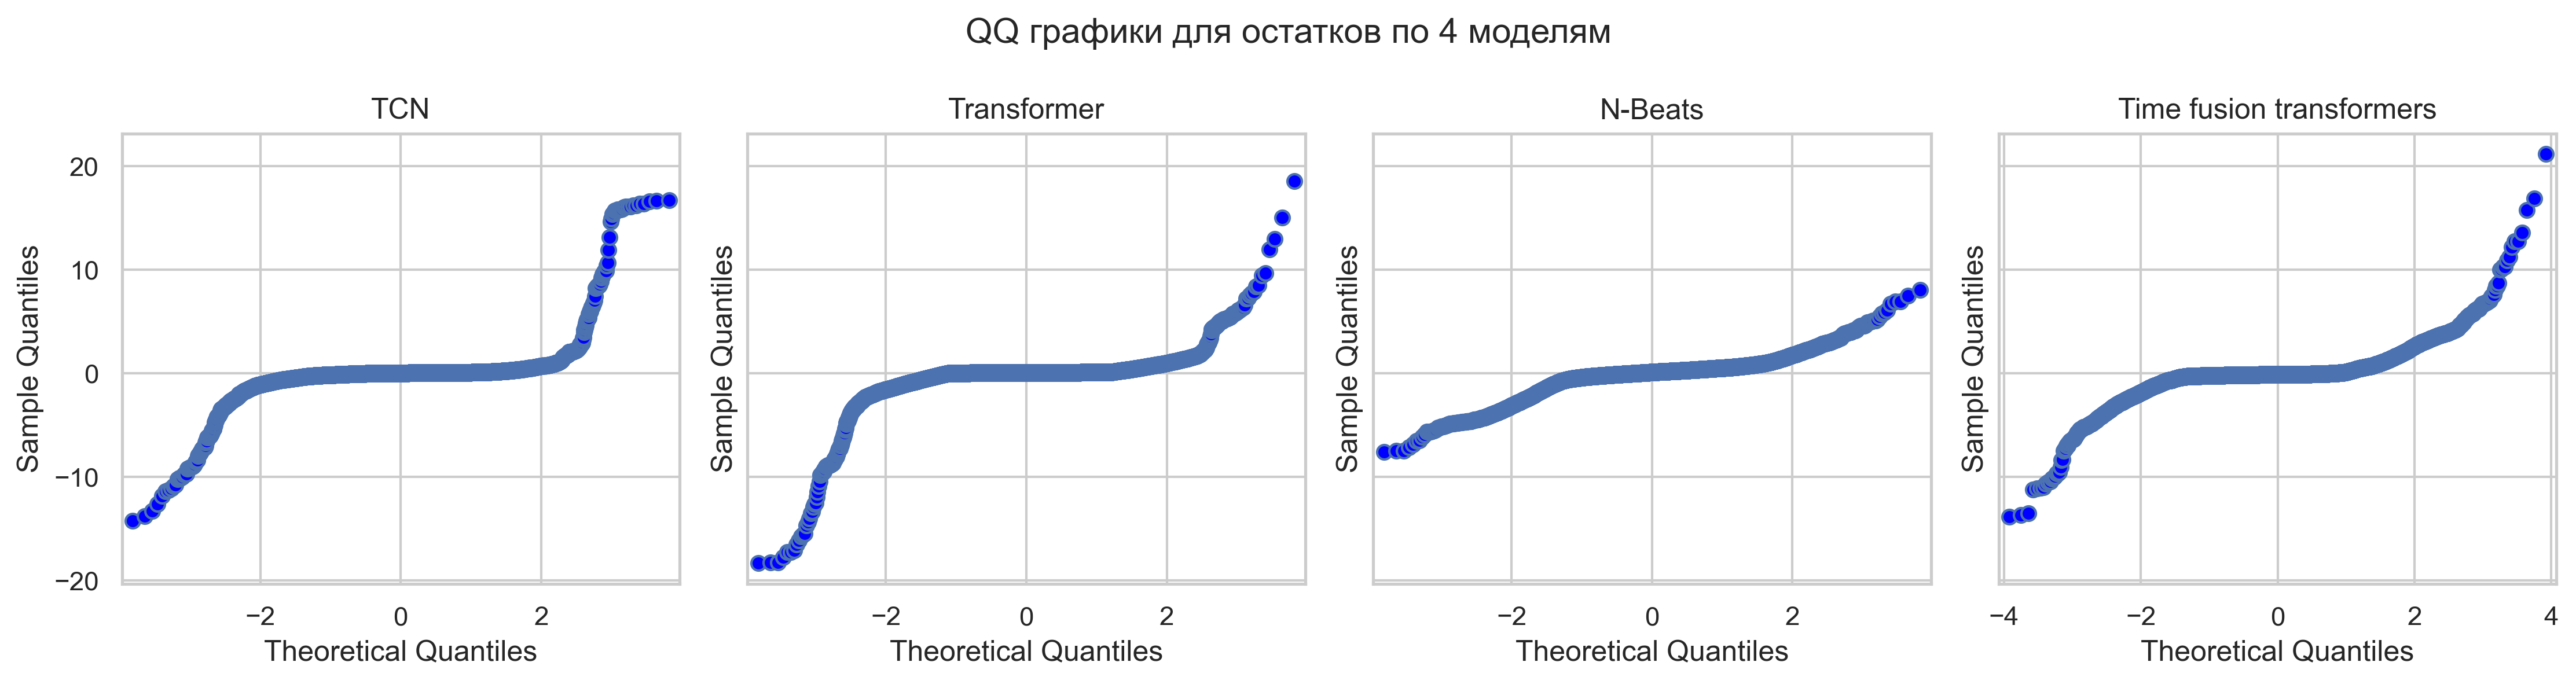

In [23]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(15,4), dpi=300)

fig=sm.qqplot(tcn_resids.resids,fit=True, ax=axs[0])
axs[0].set_title('TCN')

fig=sm.qqplot(transfomers_resid.resids,fit=True, ax=axs[1])
axs[1].set_title('Transformer')

fig=sm.qqplot(nbeats_resids.resids,fit=True, ax=axs[2])
axs[2].set_title('N-Beats')

fig=sm.qqplot(tft_resids.resids,fit=True, ax=axs[3])
axs[3].set_title('Time fusion transformers')

plt.suptitle('QQ графики для остатков по 4 моделям')
fig.tight_layout()

plt.show()

fig.savefig(IMAGE_FOLDER + 'qq_plots_resid.png', dpi=300)

In [21]:
tcninfo = pd.read_csv('tcn1/by_pump_valid_metrics.csv')
tcninfo.rename(columns={'smape':'tcn_smape'}, inplace=True)

nbeatsinfo = pd.read_csv('nbeats1/by_pump_valid_metrics.csv')
nbeatsinfo.rename(columns={'smape':'nbeats_smape'}, inplace=True)

transformerinfo = pd.read_csv('trans1/by_pump_valid_metrics.csv')
transformerinfo.rename(columns={'smape':'trans_smape'}, inplace=True)

tftinfo = pd.read_csv('tft1/by_pump_valid_metrics.csv')
tftinfo.rename(columns={'smape':'tft_smape'}, inplace=True)
result_df = result_df.join(tcninfo.tcn_smape)
result_df = result_df.join(nbeatsinfo.nbeats_smape)
result_df = result_df.join(transformerinfo.trans_smape)
result_df = result_df.join(tftinfo.tft_smape)


NameError: name 'result_df' is not defined

## LAMA (light autoML)

MAE

* Valid1 score: 0.053007568662200834
* Valid2 score: 0.05553043697379557

## Probabilistic Forecasting with Temporal Convolutional Neural Network

MAE

* для одного насоса на out-of time из train 0.023518537531857946


расчет над всеми - в процессе

## N-BEATS: Neural basis expansion analysis for interpretable time series forecasting

In [ ]:
import seaborn as sns

all_valid1_resids = resid_valid1tcn.copy()
all_valid1_resids = all_valid1_resids.append(resid_valid1trans)
all_valid1_resids = all_valid1_resids.append(resid_valid1nbeats)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches( 8.27, 11.7)
sns.violinplot( y="resids", x='model', data=all_valid1_resids, inner="quartile", palette="Set2")
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches( 8.27, 11.7)
sns.violinplot(x="pump_num", y="resids", hue='model', data=all_valid1_resids, inner="quartile", palette="Set2")